# 10-2. Boston 주택 가격 예측 모델

## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from keras.datasets import boston_housing

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data -= train_data.mean(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= train_data.std(axis=0)

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= test_data.mean(axis=0)
test_data /= test_data.std(axis=0)

## 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mae'])

## 모델 학습

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=50, batch_size=8, validation_split=0.1)

Epoch 1/50
46/46 [==============================] - 1s 5ms/step - loss: 469.3521 - mae: 19.4620 - val_loss: 229.5237 - val_mae: 13.7768
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 139.1009 - mae: 8.8915 - val_loss: 40.0275 - val_mae: 5.3034
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 42.9474 - mae: 4.7540 - val_loss: 18.8712 - val_mae: 3.7095
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 25.6669 - mae: 3.5414 - val_loss: 15.8571 - val_mae: 3.2861
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 21.1559 - mae: 3.2671 - val_loss: 14.4130 - val_mae: 3.0015
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 18.4273 - mae: 3.0044 - val_loss: 13.8462 - val_mae: 2.8875
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 16.5026 - mae: 2.8438 - val_loss: 12.3077 - val_mae: 2.6342
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss:

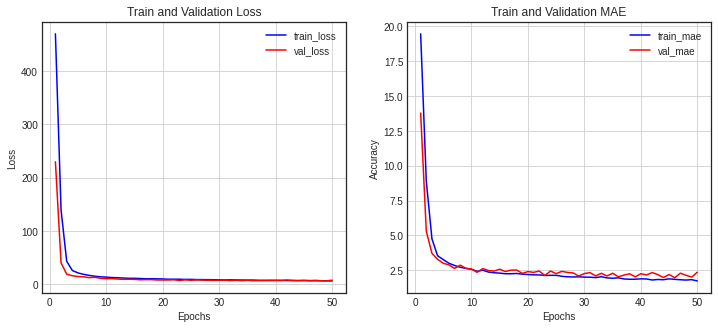

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)
print("테스트 데이터 loss : ", test_loss)
print("테스트 데이터 accuracy : ", test_mae)

4/4 [==============================] - 0s 2ms/step - loss: 17.1164 - mae: 2.8575
테스트 데이터 loss :  17.11639976501465
테스트 데이터 accuracy :  2.857484817504883
